**The group members:**

    John Clayton BLANC
    Jovany ANTOINE
    Jerry SAINT-LOUIS
    Sanon Mitelson
    
**Course:**

    Machine Learning
    
**Date:**

    06/03/2023
    
**Project description:**

    According to the WHO, breast cancer is the most commonly occurring cancer worldwide. In 2020 alone, there were 2.3 million new breast cancer diagnoses and 685,000 deaths.
    

# Breast Cancer Detection

![](https://cdn-japantimes.com/wp-content/uploads/2017/10/n-breastcancer-a-20171026.jpg)

## 1. Dependencies

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve, train_test_split
import tensorflow_io as tfio
import tensorflow as tf
from sklearn.ensemble import AdaBoostClassifier
import pickle

## 2. Load the dataset

In [5]:
data = pd.read_csv("breast-cancer.csv")
df = data.copy()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.shape

(569, 32)

## 3. Exploratory Data Analysis (EDA)

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
# Check the percentage of NAN in the trainset
df.isna().sum() / df.shape[0]

id                         0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: f

In [9]:
print(df.dtypes.value_counts())
print()
print(df.dtypes)

float64    30
int64       1
object      1
dtype: int64

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64

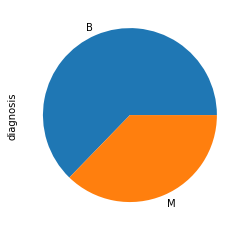

In [10]:
for col in df.select_dtypes('object'):
        plt.figure()
        df[col].value_counts().plot.pie()

C:\Users\John\AppData\Local\Temp/ipykernel_13012/3813979447.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

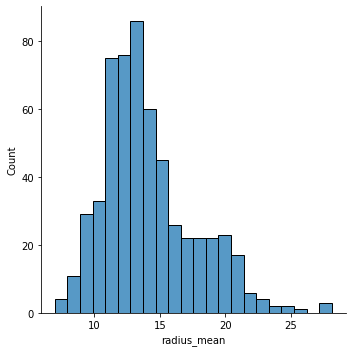

<Figure size 432x288 with 0 Axes>

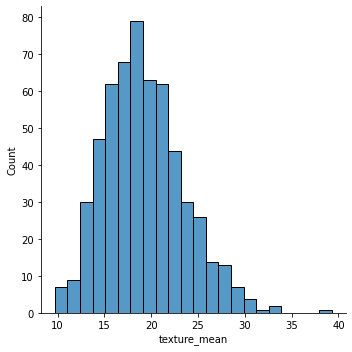

<Figure size 432x288 with 0 Axes>

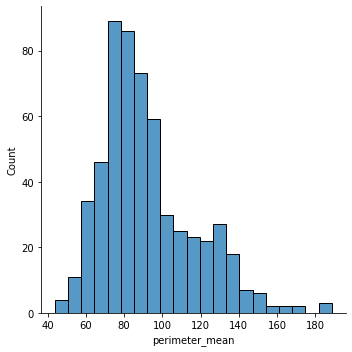

<Figure size 432x288 with 0 Axes>

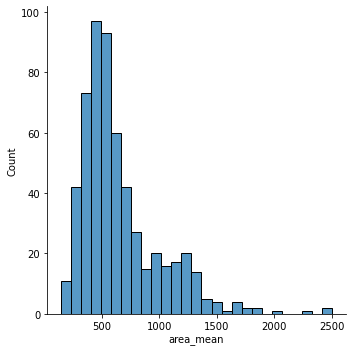

<Figure size 432x288 with 0 Axes>

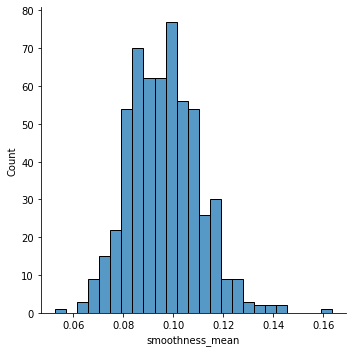

<Figure size 432x288 with 0 Axes>

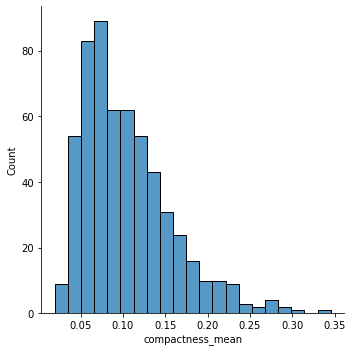

<Figure size 432x288 with 0 Axes>

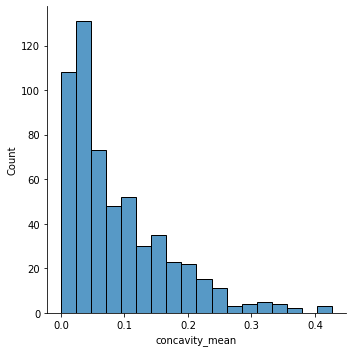

<Figure size 432x288 with 0 Axes>

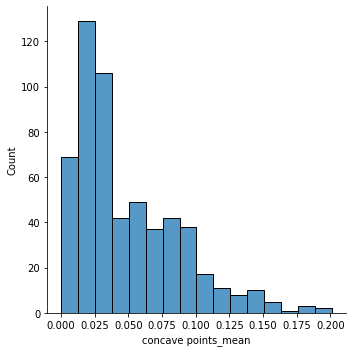

<Figure size 432x288 with 0 Axes>

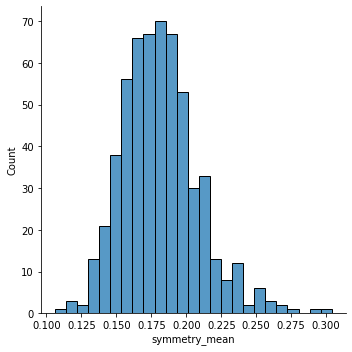

<Figure size 432x288 with 0 Axes>

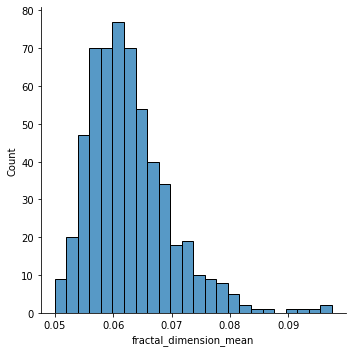

<Figure size 432x288 with 0 Axes>

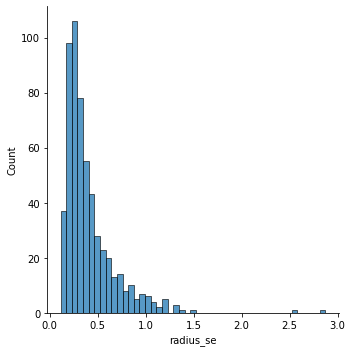

<Figure size 432x288 with 0 Axes>

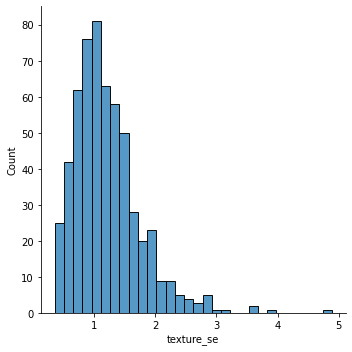

<Figure size 432x288 with 0 Axes>

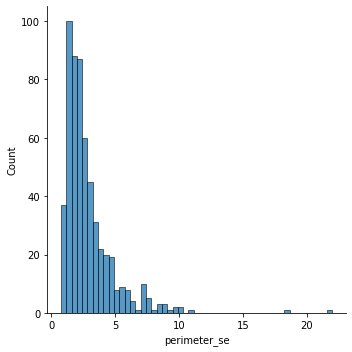

<Figure size 432x288 with 0 Axes>

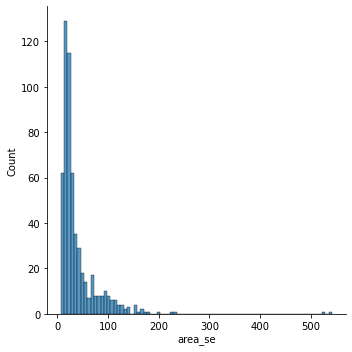

<Figure size 432x288 with 0 Axes>

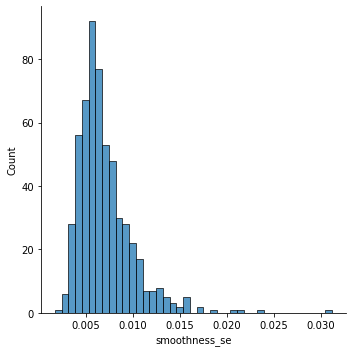

<Figure size 432x288 with 0 Axes>

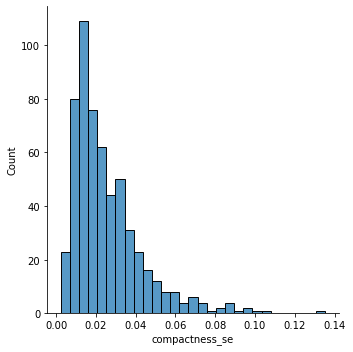

<Figure size 432x288 with 0 Axes>

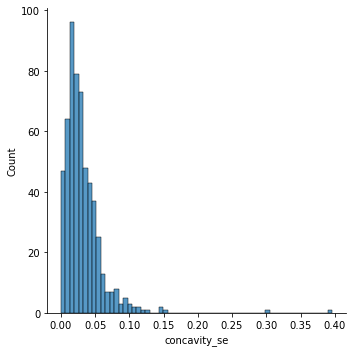

<Figure size 432x288 with 0 Axes>

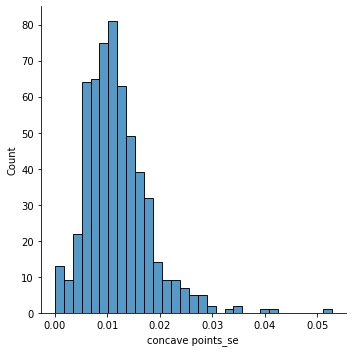

<Figure size 432x288 with 0 Axes>

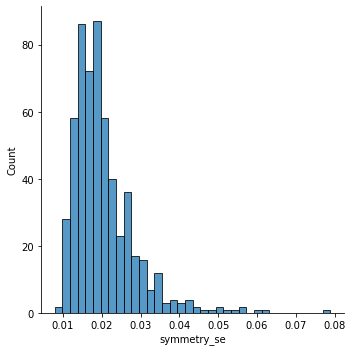

<Figure size 432x288 with 0 Axes>

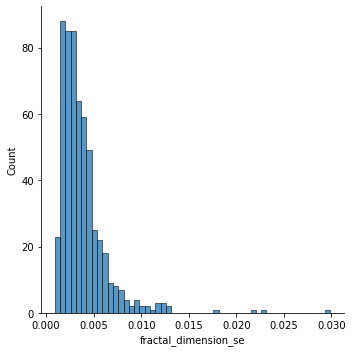

<Figure size 432x288 with 0 Axes>

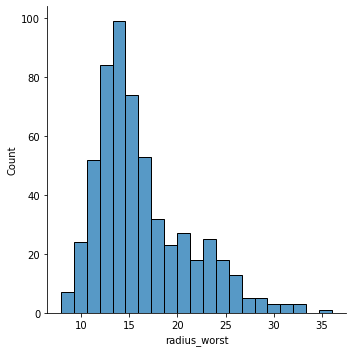

<Figure size 432x288 with 0 Axes>

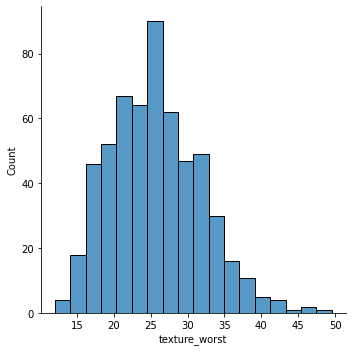

<Figure size 432x288 with 0 Axes>

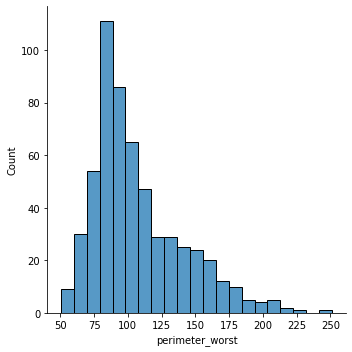

<Figure size 432x288 with 0 Axes>

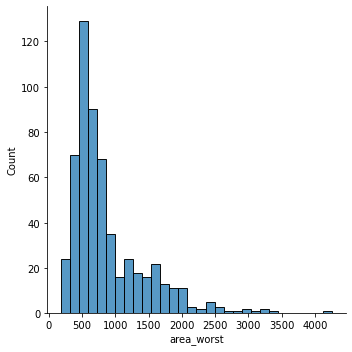

<Figure size 432x288 with 0 Axes>

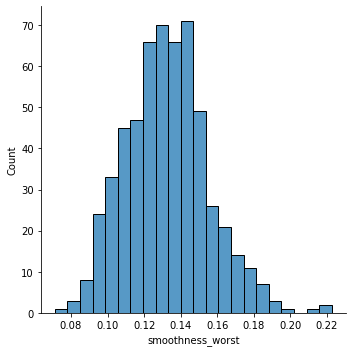

<Figure size 432x288 with 0 Axes>

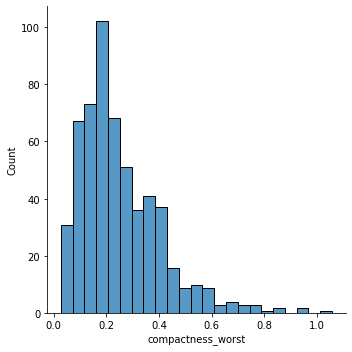

<Figure size 432x288 with 0 Axes>

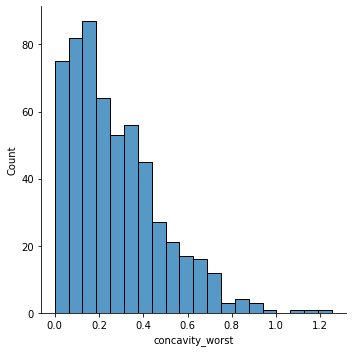

<Figure size 432x288 with 0 Axes>

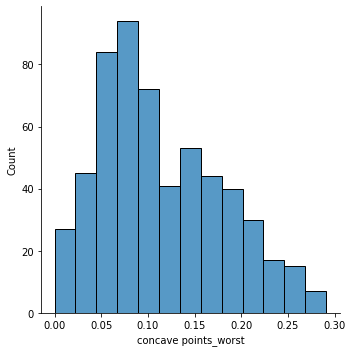

<Figure size 432x288 with 0 Axes>

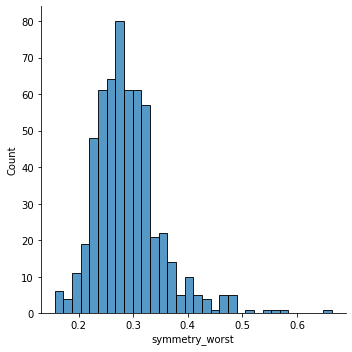

<Figure size 432x288 with 0 Axes>

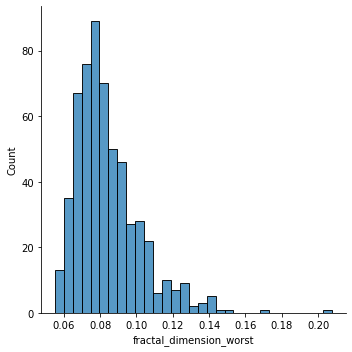

In [11]:
# Plot a histogram of the float column

for col in df.select_dtypes('float'):
    plt.figure()
    sns.displot(df[col])

C:\Users\John\AppData\Local\Temp/ipykernel_13012/651319249.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

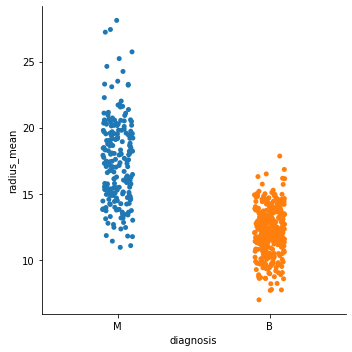

<Figure size 432x288 with 0 Axes>

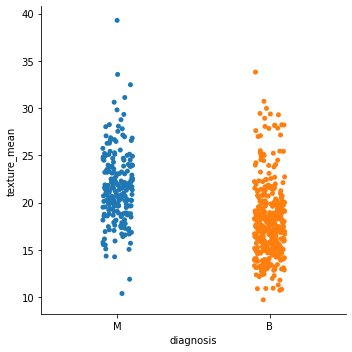

<Figure size 432x288 with 0 Axes>

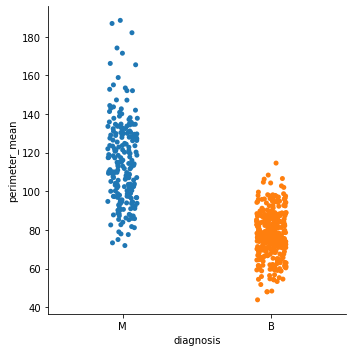

<Figure size 432x288 with 0 Axes>

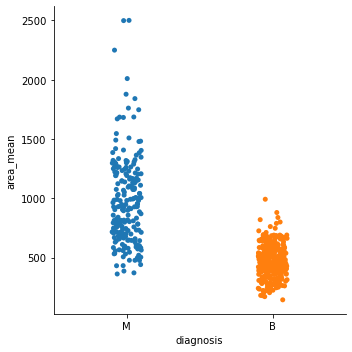

<Figure size 432x288 with 0 Axes>

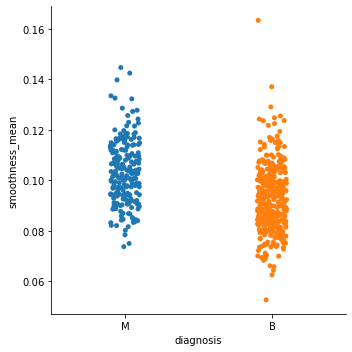

<Figure size 432x288 with 0 Axes>

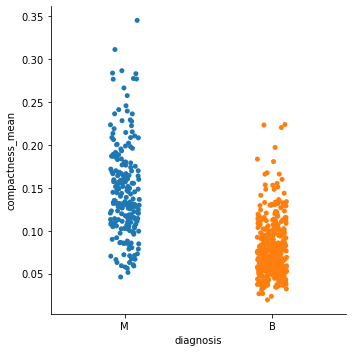

<Figure size 432x288 with 0 Axes>

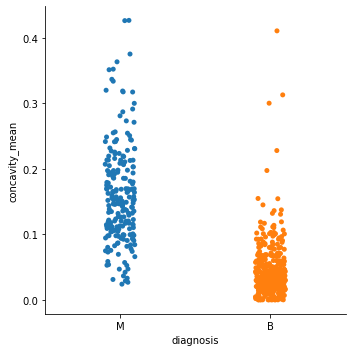

<Figure size 432x288 with 0 Axes>

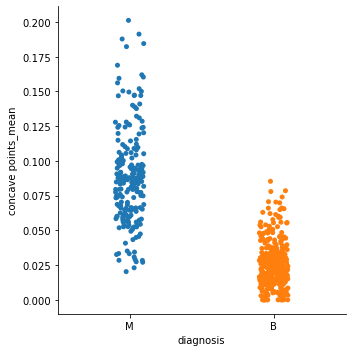

<Figure size 432x288 with 0 Axes>

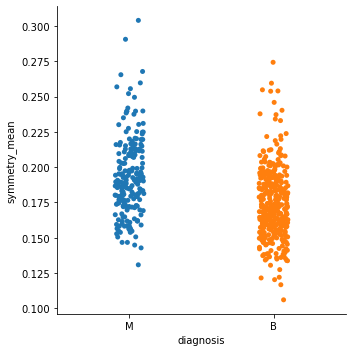

<Figure size 432x288 with 0 Axes>

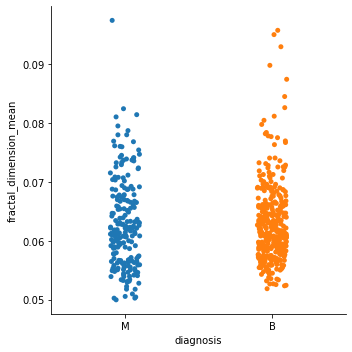

<Figure size 432x288 with 0 Axes>

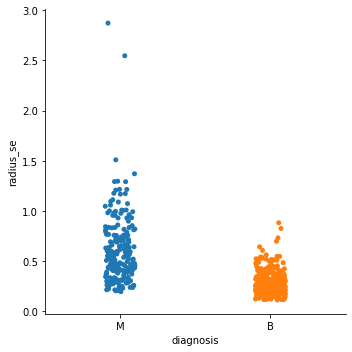

<Figure size 432x288 with 0 Axes>

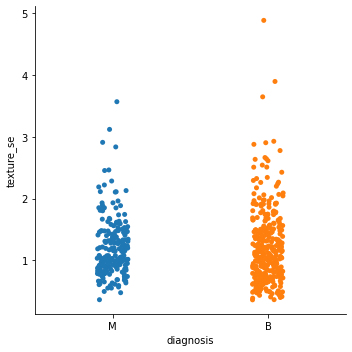

<Figure size 432x288 with 0 Axes>

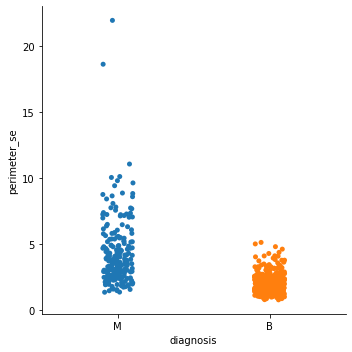

<Figure size 432x288 with 0 Axes>

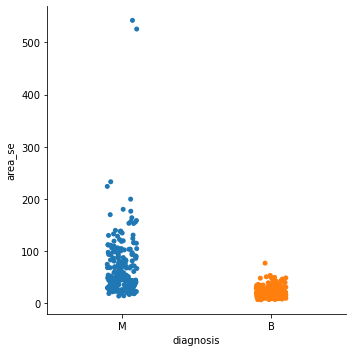

<Figure size 432x288 with 0 Axes>

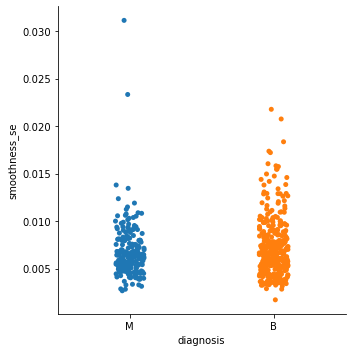

<Figure size 432x288 with 0 Axes>

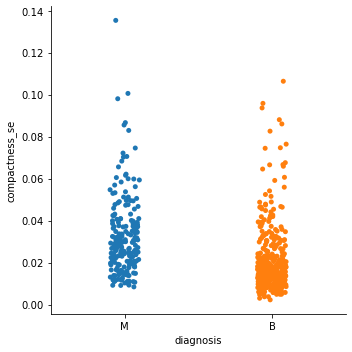

<Figure size 432x288 with 0 Axes>

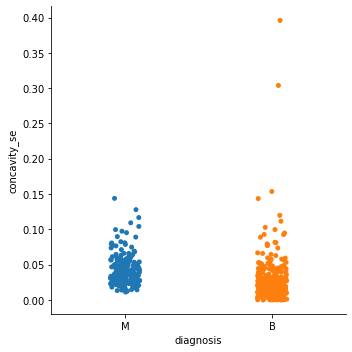

<Figure size 432x288 with 0 Axes>

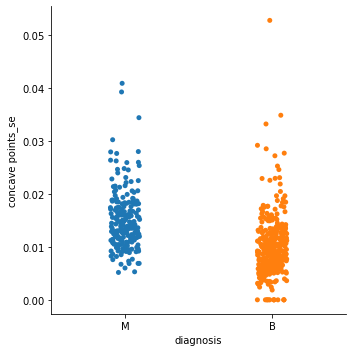

<Figure size 432x288 with 0 Axes>

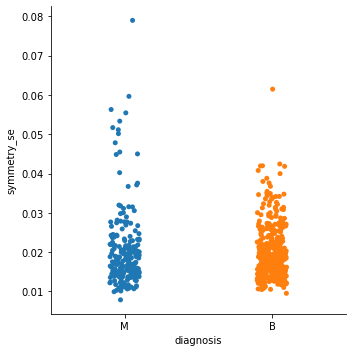

<Figure size 432x288 with 0 Axes>

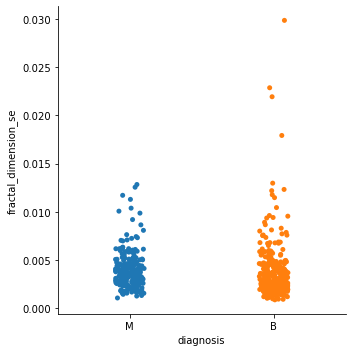

<Figure size 432x288 with 0 Axes>

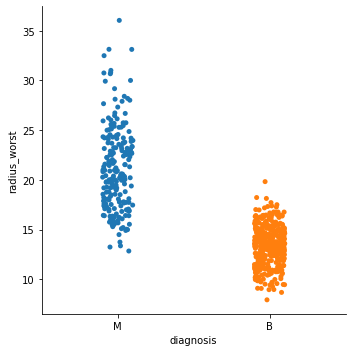

<Figure size 432x288 with 0 Axes>

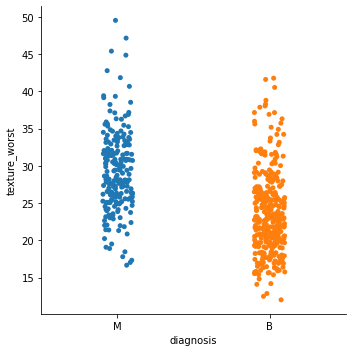

<Figure size 432x288 with 0 Axes>

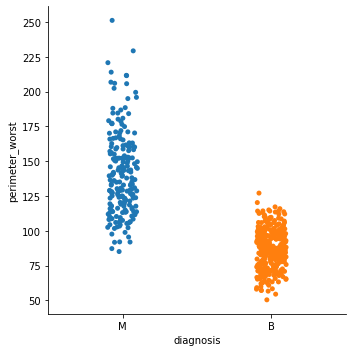

<Figure size 432x288 with 0 Axes>

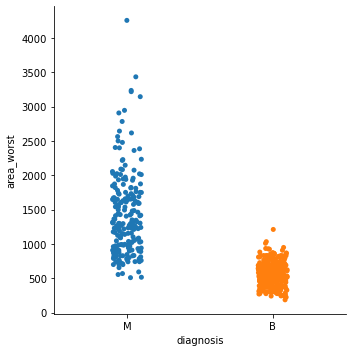

<Figure size 432x288 with 0 Axes>

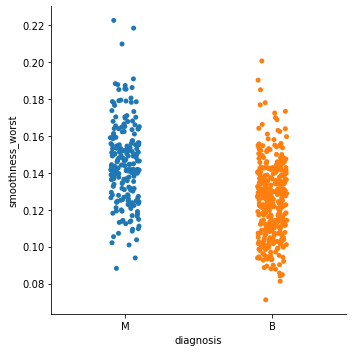

<Figure size 432x288 with 0 Axes>

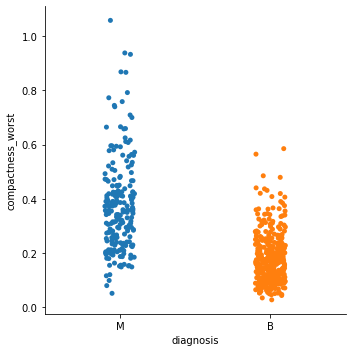

<Figure size 432x288 with 0 Axes>

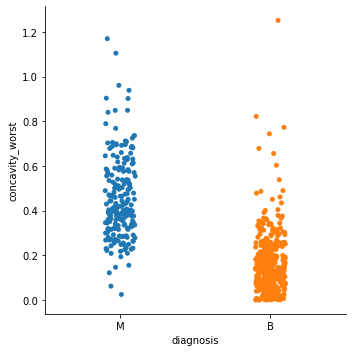

<Figure size 432x288 with 0 Axes>

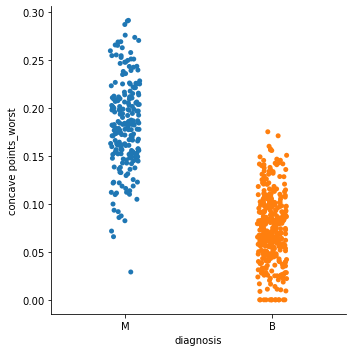

<Figure size 432x288 with 0 Axes>

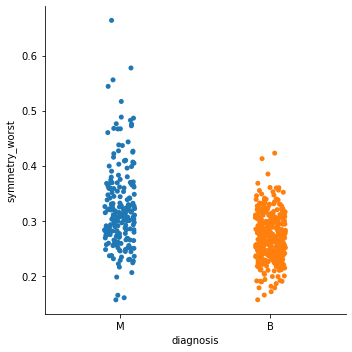

<Figure size 432x288 with 0 Axes>

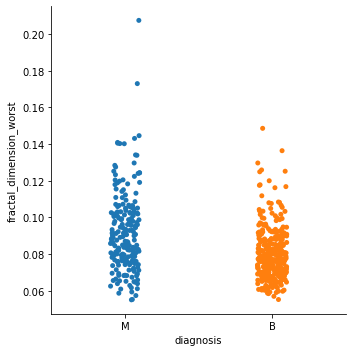

In [12]:
for col in df:
    if col not in ['id', 'diagnosis']:
        plt.figure()
        sns.catplot(data=df, x="diagnosis", y=col)

<AxesSubplot:>

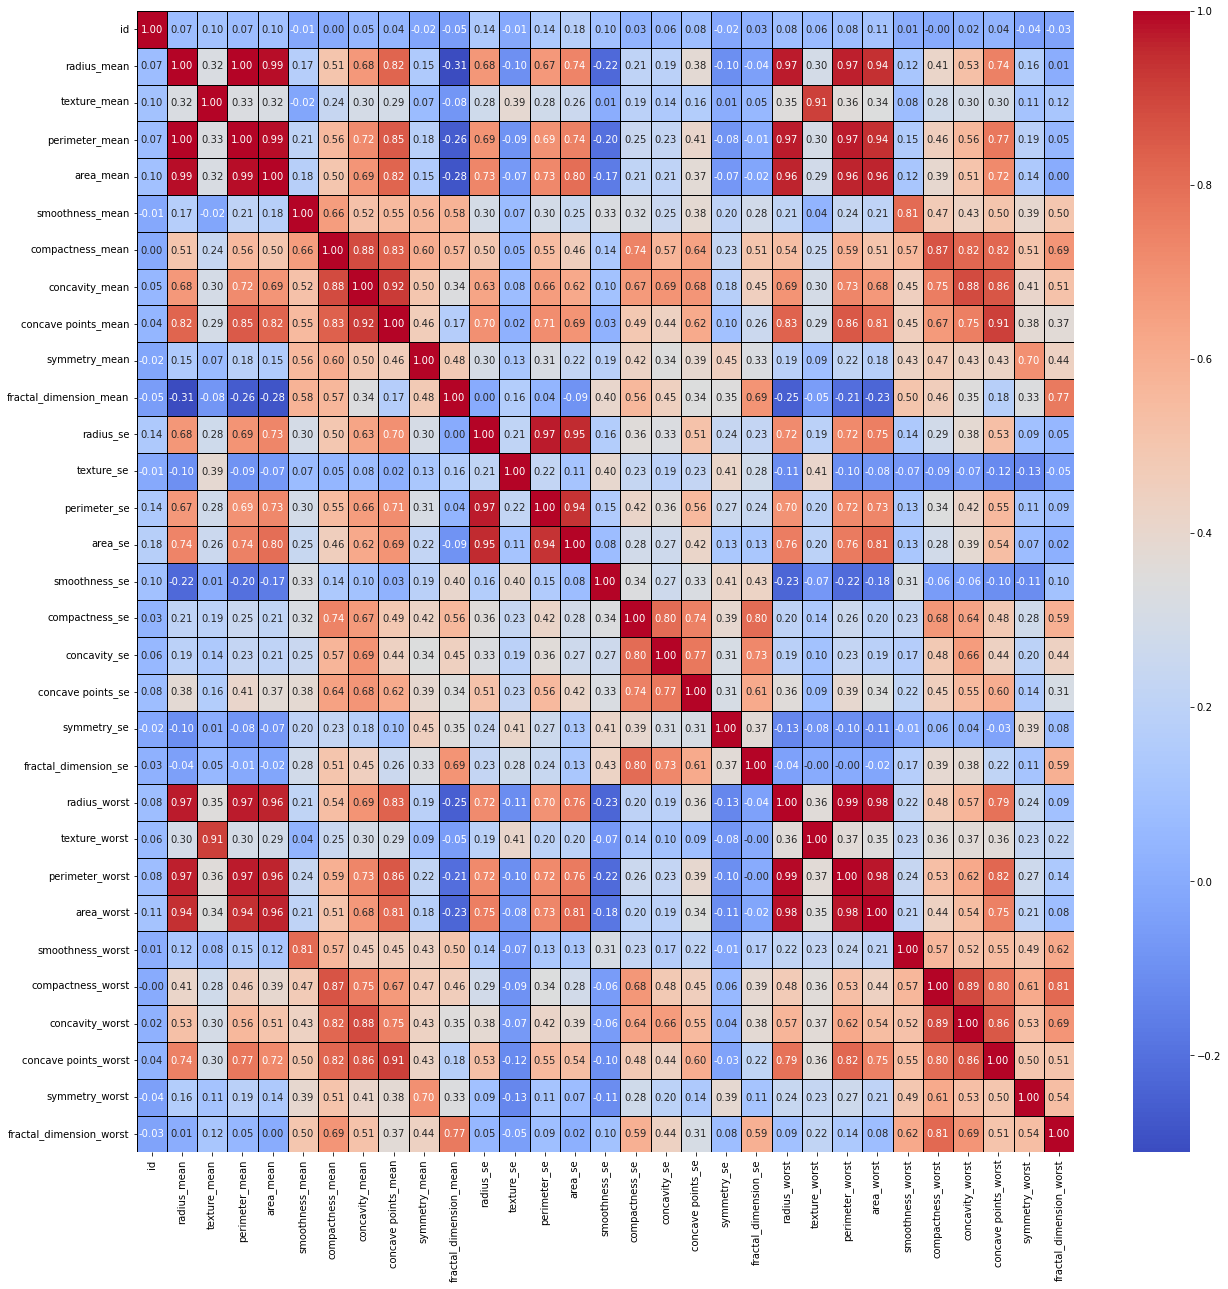

In [13]:
# Create a correlation matrix of the data
corr = df.corr()

# Set up the plot
fig, ax = plt.subplots(figsize=(21, 21))

# Plot the correlation matrix as a heatmap using Seaborn
sns.heatmap(corr, cmap="coolwarm", linecolor='black' , linewidth=1 , annot=True, fmt='.2f')

## 4. Data pre-processing

In [14]:
# Encoded the target

df["diagnosis"] = df["diagnosis"].astype('category').cat.codes

In [15]:
# Drop unnecessary column

df.drop(["id", 'radius_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean', 'concave points_mean',
         'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'smoothness_se',
         'compactness_se', 'concave points_se', 'symmetry_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 
         'area_worst', 'compactness_worst', 'concave points_worst'],  axis=1, inplace=True)

In [16]:
print(df.shape)

(569, 11)


In [17]:
df.head()

,diagnosis,texture_mean,area_mean,concavity_mean,area_se,concavity_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,1001.0,0.3001,153.40,0.05373,0.006193,0.1622,0.7119,0.4601,0.11890
1,1,17.77,1326.0,0.0869,74.08,0.01860,0.003532,0.1238,0.2416,0.2750,0.08902
2,1,21.25,1203.0,0.1974,94.03,0.03832,0.004571,0.1444,0.4504,0.3613,0.08758
3,1,20.38,386.1,0.2414,27.23,0.05661,0.009208,0.2098,0.6869,0.6638,0.17300
4,1,14.34,1297.0,0.1980,94.44,0.05688,0.005115,0.1374,0.4000,0.2364,0.07678


In [18]:
y = df['diagnosis']
X = df.drop('diagnosis', axis=1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print(X_train.shape, X_test.shape)
print( y_train.shape, y_test.shape)

(455, 10) (114, 10)
(455,) (114,)


## 5. Define the Model

**What is AdaBoost?**

The AdaBoost algorithm uses short decision trees, during the data training period. The instances that are incorrectly classified are given priority and are used as inputs for the second model - known as weak learners. This process happens again and again until the model attempts to correct the predictions made by the model before. 

Source: https://www.kdnuggets.com/2022/10/implementing-adaboost-scikitlearn.html

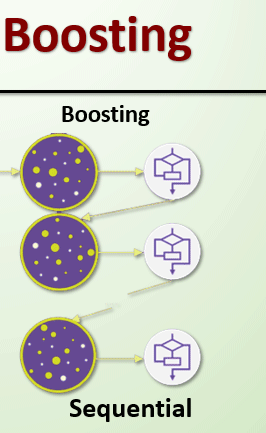

In [21]:
model = AdaBoostClassifier(random_state=0)

## 6.Training the model

In [22]:
model.fit(X, y) 

AdaBoostClassifier(random_state=0)

In [23]:
print(f"Test score KNN = {model.score(X, y) * 100}%")

Test score KNN = 100.0%


## 7. Testing the model

In [24]:
y_pred = model.predict(X_test)
print('The result: ', y_pred)

The result:  [0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]


## 8. Classification report and confusion matrix

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        43

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



Text(0.5, 24.0, 'Predicted label')

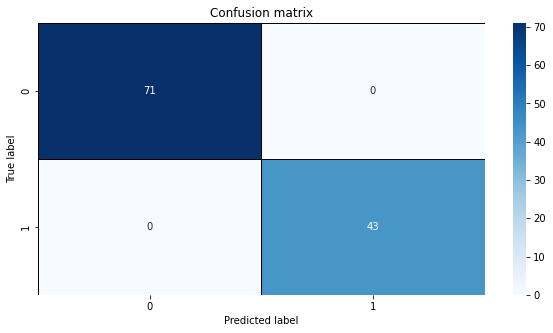

In [26]:
class_names = ["0", "1"]
cm = confusion_matrix(y_test, y_pred)
cm_data_frame = pd.DataFrame(cm , index=class_names , columns=class_names)

plt.figure(figsize = (10,5))
plt.title("Confusion matrix")
sns.heatmap(cm_data_frame, cmap="Blues", linecolor='black' , linewidth=1 , annot=True, fmt='')
plt.ylabel('True label')
plt.xlabel('Predicted label')

<AxesSubplot:>

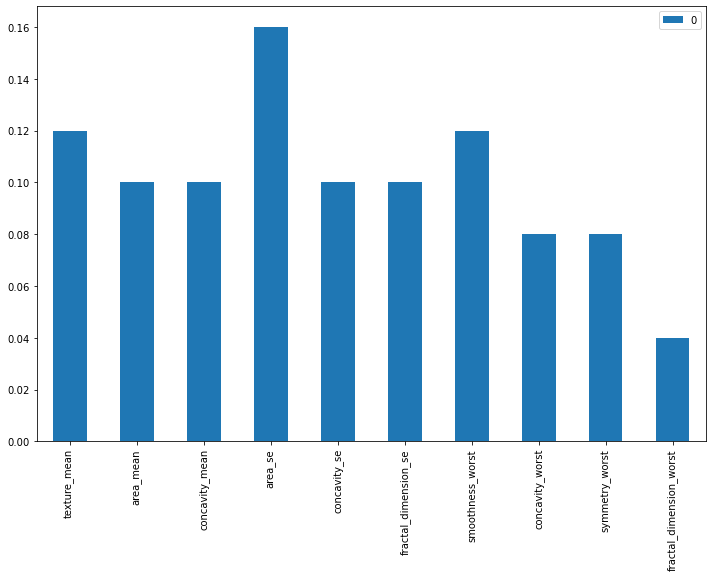

In [27]:
# feature_importances_
pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

## 9. Saving the model with 'joblib'

In [32]:
filename = "saved_model/model.pkl"

pickle.dump(model, open(filename, 'wb'))

## 10. Loading the model

In [33]:
loaded_model = pickle.load(open(filename, 'rb'))

## 11. Making predictions

In [34]:
def prediction(texture_mean, area_mean, concavity_mean, area_se, concavity_se, fractal_dimension_se, 
               smoothness_worst, concavity_worst, symmetry_worst, fractal_dimension_worst):
    data = np.array([[texture_mean, area_mean, concavity_mean, area_se, concavity_se, fractal_dimension_se, 
               smoothness_worst, concavity_worst, symmetry_worst, fractal_dimension_worst]])
    pred = loaded_model.predict(data)
    dico = {1:'Malignant', 0:'Benign'}
    print(dico.get(pred[0]))

In [35]:
prediction(14.36, 566.3, 0.06664, 23.560, 0.02387, 0.002300, 0.14400, 0.23900, 0.2977, 0.07259)

Benign
